# Importing Package and sourcing data

In [8]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
pd.options.mode.chained_assignment = None  
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("kalimati_tarkari_dataset_cleaned.csv")

# Analysing data source

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Date       197161 non-null  object 
 3   Unit       197161 non-null  object 
 4   Minimum    197161 non-null  float64
 5   Maximum    197161 non-null  float64
 6   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.5+ MB


There are 197161 data; out of which all of them are not-null type, we can say that the data is of high quality

In [4]:
#parsing the date as date
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
#Looking at few top data 
df.head()

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0


In [6]:
df['Commodity'].nunique() #finding non-unique no of commodities

132

As we can see that the data consist of 132 different commodities

In [7]:
#Lets see the range of the date available
date_range = str(df['Date'].min()) + ' - ' + str(df['Date'].max()) #finding out max and min value in year column and converting them to string with '-' added in between
date_range_days = (df['Date'].max() - df['Date'].min()).days #finding out total no of days by subtracting max and min date values

print("Consists of data from", date_range, "in total days:", date_range_days)


Consists of data from 2013-06-16 00:00:00 - 2021-05-13 00:00:00 in total days: 2888


Consists of data from 2013-06-16 00:00:00 - 2021-05-13 00:00:00 in total days: 2888


In [11]:
#Lets see how many data we have of each commodity in each year
df['Year'] = df['Date'].dt.year # extract year from date
result = df.groupby(['Commodity', 'Year']).size().unstack(fill_value=0)
print(result)


Year                 2013  2014  2015  2016  2017  2018  2019  2020  2021
Commodity                                                                
Apple(Fuji)             0     0     0     0     0     0    87   178   130
Apple(Jholey)         156   311   351   364   353   363   354   311   120
Arum                  144   252   319   308   283   194   182   211   127
Asparagus             106   189   199   163   188     1     4   134    71
Bakula                 54   142   146   140   138   124   146   127   114
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...
Turnip                 56   134    80     0     0     0     0    35   115
Turnip A               98   237   344   360   351   359   322   341   126
Water Melon(Dotted)     0     0     0     0     0     0    31     0    11
Water Melon(Green)    154   303   333   362   353   363   346   333   132
Yam                    51   165   143   126   122   141   164    96    97

[132 rows x 9 columns]


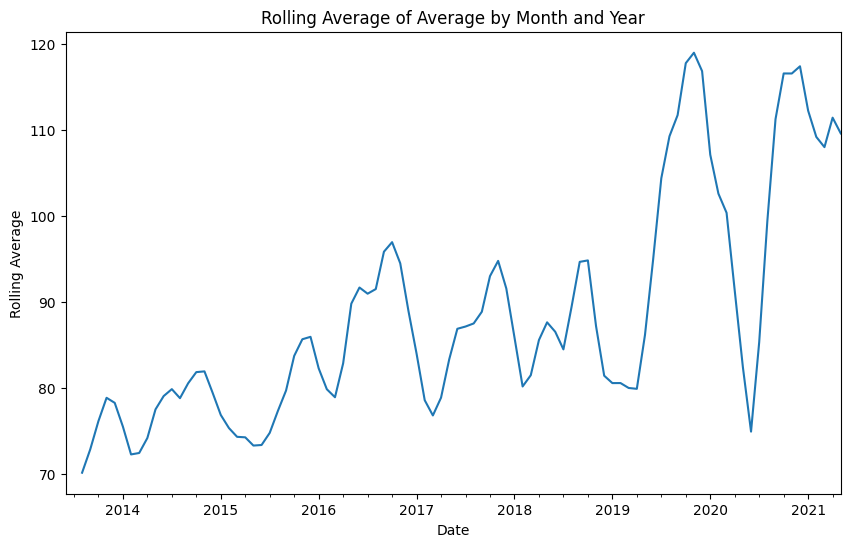

In [12]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Calculate the rolling average by each month and year
rolling_avg = df['Average'].resample('M').mean().rolling(window=3).mean()

# Plot the rolling average
plt.figure(figsize=(10, 6))
rolling_avg.plot(title='Rolling Average of Average by Month and Year')
plt.xlabel('Date')
plt.ylabel('Rolling Average')
plt.show()